#Download Tensorflow Object Detection API

In [ ]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 2764, done.
remote: Counting objects: 100% (2764/2764), done.
remote: Compressing objects: 100% (2292/2292), done.
remote: Total 2764 (delta 707), reused 1322 (delta 438), pack-reused 0
Receiving objects: 100% (2764/2764), 32.74 MiB | 26.19 MiB/s, done.
Resolving deltas: 100% (707/707), done.


In [ ]:
%%bash
# sudo apt install -y protobuf-compiler
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1657639 sha256=a342f211556b5eff4f97a782ad77c47be4d1e7deca0532c3221fdd93f646d0c1
  Stored in directory: /tmp/pip-ephem-wheel-cache-s013blct/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
  Created wheel for avro-python3: filename=avro_python3-1.10.2-cp37-none-any.whl size=44011 sha256=203fea6f36d3fec4edde5c1d2037fe9fea3a1689773420354064c55f032efa64
  Stored in directory: /root/.cache/pip/wheels/ee/ee/18/c466221ca6900e3efce2f4ea9c329288808679aecdcb2838d3
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491070 sha256=19bf8dac167422d06e56482745a96fdfd5124342ff270cf0e7ba3d9f42fcaab9
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
  Created wheel for dill: filename=dill-0.3.1.1-cp37-none-any.whl size=78545 sha256=3bc26d88f36386bd0bbd0e47f7ba61156ec457c54da8da925099

ERROR: multiprocess 0.70.12.2 has requirement dill>=0.3.4, but you'll have dill 0.3.1.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: apache-beam 2.30.0 has requirement avro-python3!=1.9.2,<1.10.0,>=1.8.1, but you'll have avro-python3 1.10.2 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!curl -L "https://app.roboflow.com/ds/Zc0BTJ2Jce?key=PsJBJ2WOJX" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   891  100   891    0     0   1757      0 --:--:-- --:--:-- --:--:--  1753
100 94.1M  100 94.1M    0     0  62.8M      0  0:00:01  0:00:01 --:--:--  154M
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/Apple.tfrecord     
 extracting: test/Apple_label_map.pbtxt  
   creating: train/
 extracting: train/Apple.tfrecord    
 extracting: train/Apple_label_map.pbtxt  
   creating: valid/
 extracting: valid/Apple.tfrecord    
 extracting: valid/Apple_label_map.pbtxt  


In [ ]:
pipeline_file = '/content/drive/MyDrive/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/pipeline.config'
#model_dir = '/content/drive/MyDrive/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/new_training_from_scratch'

#transfer learning later
model_dir = '/content/drive/MyDrive/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/transfer_learning'

#running normal training

In [ ]:
!python /content/models/research/object_detection/model_main_tf2.py --model_dir={model_dir} --pipeline_config_path={pipeline_file} --TF_GPU_ALLOCATOR=cuda_malloc_async --checkpoint_every_n 500
#cuda_malloc_async is set to work for large tensors, it's actually optional
#checkpoint_every_n is how many steps have to occur before tensorflow saves the model's variables into a checkpoint file
#model_dir is the training directory where the summary of the training events along with model checkpoint files are saved
#pipeling_config_path is the path to the pipeline_config file

2021-06-26 04:34:13.529958: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-26 04:34:15.373835: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-26 04:34:15.409183: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-26 04:34:15.409789: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-26 04:34:15.409836: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-26 04:34:15.412449: I tensorflow/stream_executor/platform/default

## **Exporting a Trained Inference Graph**
Once your training job is complete, you need to extract the newly trained inference graph, which will be later used to perform the object detection. This can be done as follows:

In [ ]:
import re
import numpy as np
import os

output_directory = '/content/drive/MyDrive/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/fine_tuned_model'
best_ckpt_dir = os.path.join(model_dir, 'best_ckpt')

# filenames = list(pathlib.Path(model_dir).glob('*.index'))

# filenames.sort(key=lambda f: int(re.sub('\D', '', str(f))))
# #generally you want to put the last ckpt from training in here
# last_model_path = str(filenames[-1]).replace('.index','')


!python /content/models/research/object_detection/exporter_main_v2.py \
    --input_type=image_tensor \
    --pipeline_config_path={pipeline_file} \
    --output_directory={output_directory} \
    --trained_checkpoint_dir={best_ckpt_dir}

2021-06-26 08:27:18.261932: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-26 08:27:19.975323: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-26 08:27:20.003866: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-26 08:27:20.004484: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-26 08:27:20.004525: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-26 08:27:20.007109: I tensorflow/stream_executor/platform/default

In [ ]:
#This step checks the input and output column names and shapes for the exported model
!saved_model_cli show --dir {output_directory + '/saved_model'} --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['input_tensor'] tensor_info:
      dtype: DT_UINT8
      shape: (1, -1, -1, 3)
      name: serving_default_input_tensor:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['detection_anchor_indices'] tensor_info:
      dtype: DT_FLOAT
      shape: (1, 100)
      name: StatefulPartitionedCall:0
  outputs['detection_boxes'] tensor_info:
      dtype: DT_FLOAT
      shape: (1, 100, 4)
      name: StatefulPartitionedCall:1
  outputs['detection_classes'] tensor_info:
      dtype: DT_FLOAT
      shape: (1, 100)
      name: StatefulPartitionedCall:2
  outputs['detection_multiclass_scores'] tensor_info:
      dtype: DT_FLOAT
      shape: (1, 100, 2)
      name: StatefulPartitionedCall:3
  outputs['detection_scores'] tensor_info:
      dtype: DT_FLOAT
      shape: (1, 100)
      name: StatefulPartitionedCall:4
  outputs['num_detections'] tensor_info:
      dtype: DT_FLOAT
      shape: (1)
    

#Converting .pb file to .onnx format

In [ ]:
!pip install -U tf2onnx

     |████████████████████████████████| 378kB 7.5MB/s 
     |████████████████████████████████| 12.2MB 249kB/s 


In [ ]:
saved_model_path = '/content/drive/MyDrive/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/fine_tuned_model/saved_model'
graph_inputs = 'serving_default_input_tensor'
graph_outputs = 'StatefulPartitionedCall'
output_onnx = '/content/drive/MyDrive/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/fine_tuned_model/onnx_model/saved_model.onnx'
#frozen_graph = '/content/drive/MyDrive/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/fine_tuned_model/onnx_model/frozen.pb'

In [ ]:
#Conversion to Onnx format
!python -m tf2onnx.convert --saved-model {saved_model_path} --opset=13 --output {output_onnx} --tag serve --signature_def serving_default --fold_const

2021-06-26 08:35:07.634385: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2021-06-26 08:35:08.845889: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-26 08:35:08.874589: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-26 08:35:08.875211: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBan

#Running test inference

In [ ]:
#downloading test images from Roboflow
#export dataset above with format COCO JSON
#or import your test images via other means. 
%mkdir /content/test_images/
%cd /content/test_images/
!curl -L "https://app.roboflow.com/ds/E9nAClfZ7S?key=rqAkjJ2GHT" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

%matplotlib inline

In [ ]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: the file path to the image

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [ ]:
import pathlib
import re

best_ckpt_dir = os.path.join(model_dir, 'best_ckpt')

filenames = list(pathlib.Path(best_ckpt_dir).glob('*.index'))

filenames.sort(key=lambda f: int(re.sub('\D', '', str(f))))

#recover our saved model
pipeline_config = pipeline_file
#generally you want to put the last ckpt from training in here
best_ckpt_dir = str(filenames[-1]).replace('.index','')
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
detection_model = model_builder.build(
      model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(
      model=detection_model)
ckpt.restore(os.path.join(best_ckpt_dir))

In [ ]:
def get_model_detection_function(model):
  """Get a tf.function for detection."""

  @tf.function
  def detect_fn(image):
    """Detect objects in image."""

    image, shapes = model.preprocess(image)
    prediction_dict = model.predict(image, shapes)
    detections = model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

  return detect_fn

detect_fn = get_model_detection_function(detection_model)

In [ ]:
#map labels for inference decoding
# label_map_path = configs['eval_input_config'].label_map_path
label_map_path = "/content/test/Apple_label_map.pbtxt"
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

In [ ]:
#run detector on test image
#it takes a little longer on the first run and then runs at normal speed. 
import random
import glob

TEST_IMAGE_PATHS = glob.glob('/content/test_images/test/*.jpg')
# image_path = random.choice(TEST_IMAGE_PATHS)
image_path = '/content/test_images/test/BD04_inf_201724_004_06_RGB_jpg.rf.5f5bc76106c8e6558201f2293011e4c3.jpg'
image_np = load_image_into_numpy_array(image_path)

# Things to try:
# Flip horizontally
# image_np = np.fliplr(image_np).copy()

# Convert image to grayscale
# image_np = np.tile(
#     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

input_tensor = tf.convert_to_tensor(
    np.expand_dims(image_np, 0), dtype=tf.float32)
detections, predictions_dict, shapes = detect_fn(input_tensor)

print(detections['detection_boxes'])
print(detections['detection_scores'])
print(detections['detection_classes'])

In [ ]:
image_np

array([[[ 38,  39,  31],
        [ 66,  67,  61],
        [ 99,  98,  93],
        ...,
        [143, 142, 148],
        [157, 156, 162],
        [166, 165, 171]],

       [[ 42,  43,  35],
        [ 66,  65,  60],
        [ 92,  91,  86],
        ...,
        [148, 147, 153],
        [160, 159, 165],
        [169, 168, 174]],

       [[ 48,  48,  40],
        [ 65,  65,  57],
        [ 84,  81,  76],
        ...,
        [158, 155, 162],
        [169, 166, 173],
        [177, 174, 181]],

       ...,

       [[  0,  27,   7],
        [  0,  27,   8],
        [  0,  27,   8],
        ...,
        [ 14,  24,  16],
        [  9,  15,  11],
        [  9,  13,  12]],

       [[  1,  28,  11],
        [  0,  27,  10],
        [  0,  26,   9],
        ...,
        [ 12,  22,  14],
        [  8,  14,  12],
        [  7,  11,  12]],

       [[  2,  29,  12],
        [  1,  28,  11],
        [  0,  27,  10],
        ...,
        [ 10,  20,  12],
        [  7,  11,  10],
        [  6,  10,  11]]

INFO:tensorflow:depth of additional conv before box predictor: 0
Instructions for updating:
box_ind is deprecated, use box_indices instead
Instructions for updating:
Use ref() instead.


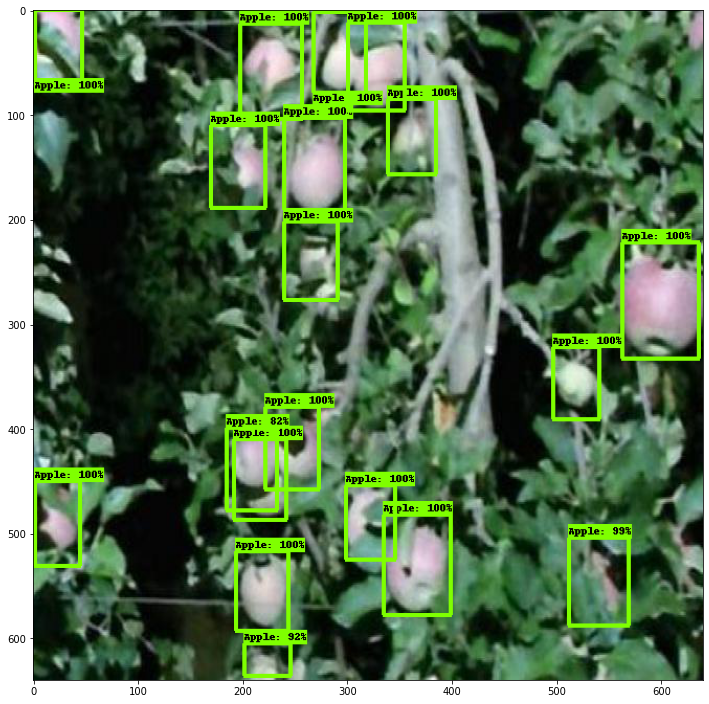

In [ ]:
#run detector on test image
#it takes a little longer on the first run and then runs at normal speed. 
import random
import glob

TEST_IMAGE_PATHS = glob.glob('/content/test_images/test/*.jpg')
# image_path = random.choice(TEST_IMAGE_PATHS)
image_path = '/content/test_images/test/BD04_inf_201724_004_06_RGB_jpg.rf.5f5bc76106c8e6558201f2293011e4c3.jpg'
image_np = load_image_into_numpy_array(image_path)

# Things to try:
# Flip horizontally
# image_np = np.fliplr(image_np).copy()

# Convert image to grayscale
# image_np = np.tile(
#     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

input_tensor = tf.convert_to_tensor(
    np.expand_dims(image_np, 0), dtype=tf.float32)
detections, predictions_dict, shapes = detect_fn(input_tensor)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'][0].numpy(),
      (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
      detections['detection_scores'][0].numpy(),
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.50,
      agnostic_mode=False,
)

plt.figure(figsize=(12,16))
plt.imshow(image_np_with_detections)
plt.show()